### Monte Carlo Simulation with GBM of Total Recycled Plastic Waste

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scs

##### SImulating Demand with Geometric Brownian Motion

### $$ dS_t  = \mu S_tdt + \sigma S_tdW_t $$

Integrated Form:

### $$ S_t  = S_0e^{(\mu - \frac{\sigma^2}{2})t + \sigma W_t} $$

In [63]:
# Parameters
# drift coefficent
mu = 0.28162
# number of steps
n = 60
# time in years
T = 5
# number of sims
M = 10000
# initial demand
S0 = 10000
# volatility
sigma = 0.1111

dt = T/n

In [102]:
np.random.seed(1234)
# calc each time step
dt = T/n
# simulation using numpy arrays
demand = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
)
# include array of 1's
demand = np.vstack([np.ones(M), demand])
# multiply through by S0 and return the cumulative product of elements along a given simulation path axis=0. 
demand_trend = 1 * demand.cumprod(axis=0)
demand = S0 * demand.cumprod(axis=0)

In [65]:
# Define time interval correctly 
time = np.linspace(0,T,n+1)
# Require numpy array that is the same shape as St
tt = np.full(shape=(M,n+1), fill_value=time).T

In [138]:
pop_trend = (np.ones(T+1) * 0.158879).cumsum() - 0.158879 + S0
plastic_trend = ((np.ones(T+1) * 1.218).cumprod() - 0.218) * S0

<function matplotlib.pyplot.show(close=None, block=None)>

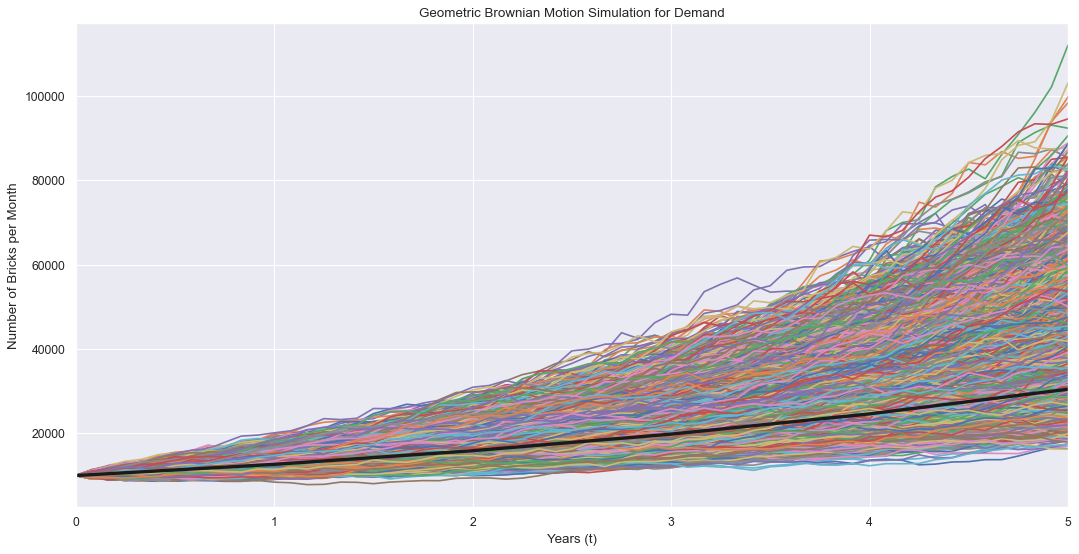

In [141]:
plt.figure(figsize=(16, 8), dpi=80)
sns.set(style="darkgrid")

plt.plot(tt, demand)
#plt.plot(pop_trend, c ='k', linewidth=3.0)
plt.plot(plastic_trend, c ='k', linewidth=3.0)
plt.xlabel("Years (t)")
plt.ylabel("Number of Bricks per Month")
plt.title("Geometric Brownian Motion Simulation for Demand")
plt.xlim([0, T])
plt.show

In [143]:
demand_df =pd.DataFrame(demand.T)

In [196]:
probs0 = 0
probs1 = scs.percentileofscore(demand_df[12], plastic_trend[1])
probs2 = scs.percentileofscore(demand_df[24], plastic_trend[2])
probs3 = scs.percentileofscore(demand_df[36], plastic_trend[3])
probs4 = scs.percentileofscore(demand_df[48], plastic_trend[4])
probs5 = scs.percentileofscore(demand_df[60], plastic_trend[5])
probs = [probs0, probs1,probs2,probs3,probs4,probs5]
probability_of_failure = pd.DataFrame({'Minimum Demand (VaR)' : plastic_trend, 'Probability' : probs})

In [197]:
probability_of_failure

,Minimum Demand (VaR),Probability
0,10000.000000,0.00
1,12655.240000,35.83
2,15889.322320,29.13
3,19828.434586,23.40
4,24626.273325,18.35
5,30470.040910,14.69


In [198]:
pers = [0.01, 0.52, 1.0, 2.5, 5.0, 3.03]
var1 = scs.scoreatpercentile(demand_df[12], pers)
var2 = scs.scoreatpercentile(demand_df[24], pers)
var3 = scs.scoreatpercentile(demand_df[36], pers)
var4 = scs.scoreatpercentile(demand_df[48], pers)
var5 = scs.scoreatpercentile(demand_df[60], pers)
var_df = pd.DataFrame({'Percentile' : pers, 'Var 1' : var1, 'Var 2' : var2, 'Var 3' : var3, 'Var 4' : var4, 'Var 5' : var5})

In [199]:
var_df

,Percentile,Var 1,Var 2,Var 3,Var 4,Var 5
0,0.01,9040.761230,9954.695162,12070.976589,13512.494572,16367.627647
1,0.52,10014.787082,11558.046864,13830.284520,16950.612280,21106.432951
2,1.00,10248.291593,12036.965780,14560.412077,17875.149635,22068.115420
3,2.50,10640.008448,12702.540916,15620.972988,19379.127555,24071.825968
4,5.00,10983.440413,13371.853554,16641.771691,20886.242398,26260.260111
5,3.03,10724.532835,12930.782132,15905.269431,19705.083255,24639.178242


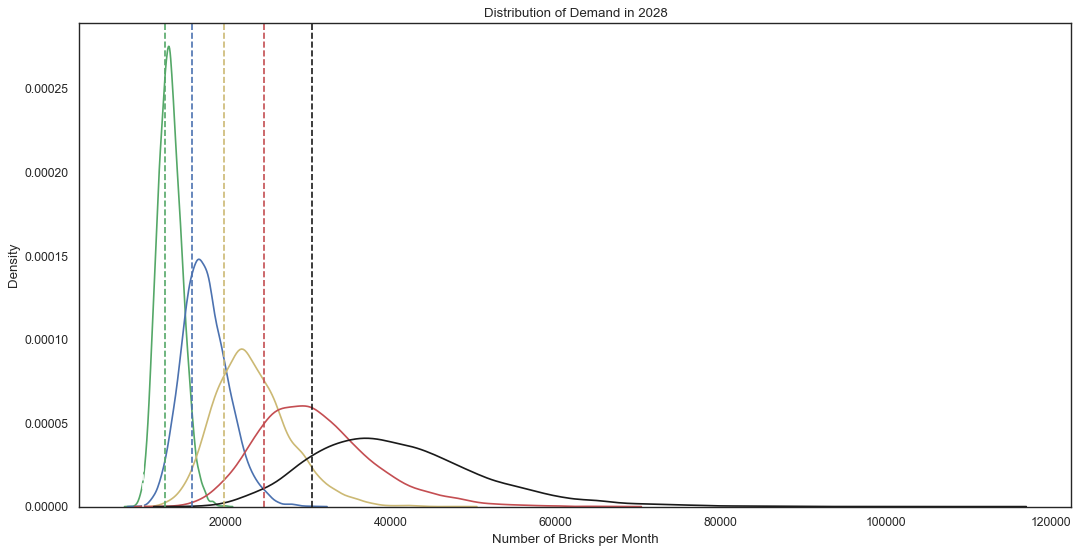

In [221]:
plt.figure(figsize=(16, 8), dpi=80)
sns.set(style="white")
sns.kdeplot(demand_df[12], c = 'g')
sns.kdeplot(demand_df[24], c = 'b')
sns.kdeplot(demand_df[36], c = 'y')
sns.kdeplot(demand_df[48], c = 'r')
sns.kdeplot(demand_df[60], c = 'k')
plt.title("Distribution of Demand in 2028")
plt.xlabel("Number of Bricks per Month")

color = ['w','g','b','y','r','k']
months = [12,24,36,48,60]
for i in range(6):
    plt.axvline(probability_of_failure['Minimum Demand (VaR)'][i], c=color[i], linestyle = 'dashed')

plt.show()

In [72]:
print("The most probable demand in 2028 is:\n" + str(demand_df[60].median()))

The most probable demand in 2028 is:
39552.739316313666


##### SImulating Total Polyethylene Waste Recycled

### $$ Recycled_t  = \sum_{x = 0}^{t}S_t * P $$
S = Units sold\
P = Plastic(kg) per unit

In [74]:
benchmark =  1000000
plastic = 0.65

In [75]:
R = (demand*plastic).cumsum(axis=0)

<function matplotlib.pyplot.show(close=None, block=None)>

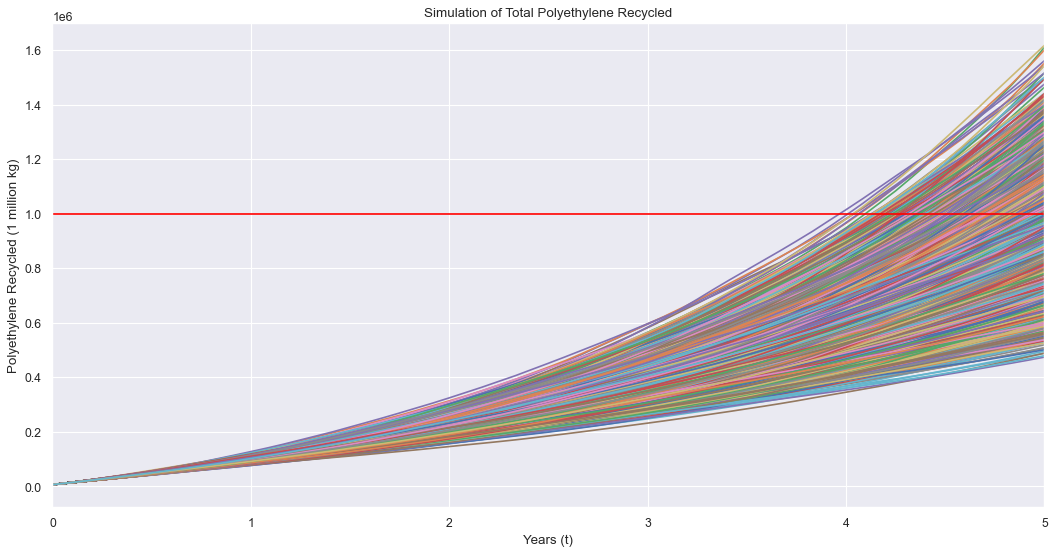

In [80]:
plt.figure(figsize=(16, 8), dpi=80)
sns.set(style="darkgrid")

plt.plot(tt, R)
plt.xlabel("Years (t)")
plt.ylabel("Polyethylene Recycled (1 million kg)")
plt.title("Simulation of Total Polyethylene Recycled")
plt.xlim([0, T])
plt.axhline(benchmark, c='red')
plt.show

In [81]:
recycled_df =pd.DataFrame(R.T)

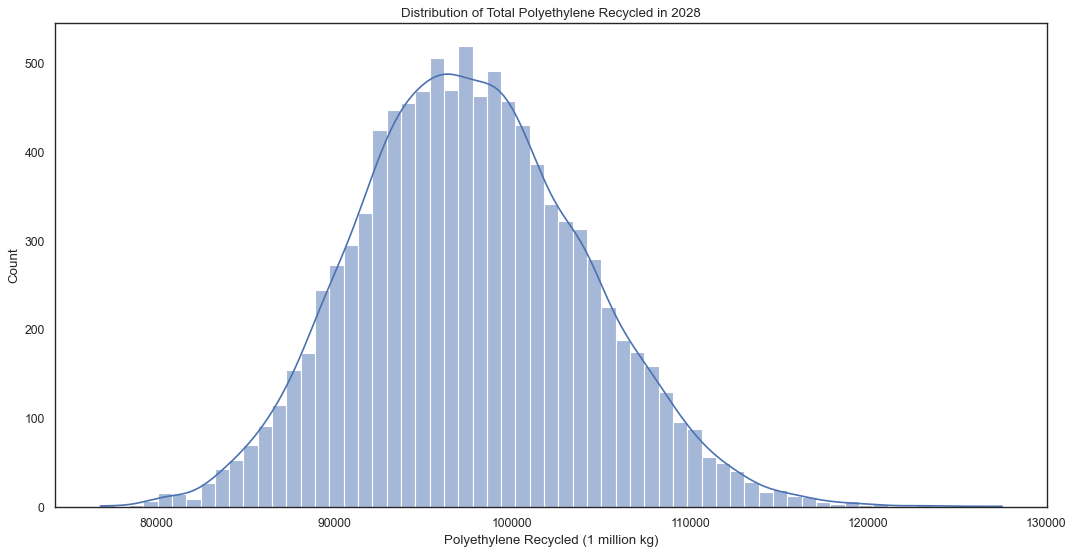

In [82]:
plt.figure(figsize=(16, 8), dpi=80)
sns.set(style="white")
sns.histplot(recycled_df[12], kde=True)
plt.title("Distribution of Total Polyethylene Recycled in 2028")
plt.xlabel("Polyethylene Recycled (1 million kg)")
plt.show()

In [49]:
prob = (sum(x > benchmark for x in recycled_df[60])/len(recycled_df[60]))

In [50]:
print("The probability of recycling above benchmark is:")
print(str(prob*100) + "%")

The probability of recycling above benchmark is:
18.07%


##### Bayesian Optimisation Minimal Amount of Plastic per Brick to Achieve Benchmark

In [9]:
def recycle_eval(P):
    dt = T/n
    # simulation using numpy arrays
    demand = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(M,n)).T
    )
    # include array of 1's
    demand = np.vstack([np.ones(M), demand])
    # multiply through by S0 and return the cumulative product of elements along a given simulation path axis=0. 
    demand = S0 * demand.cumprod(axis=0)
    if x<0: x = 999999
    return -x

In [10]:
#!pip install bayesian-optimization
from bayes_opt import BayesianOptimization

recycle_bo = BayesianOptimization(recycle_eval, {'P' : (0.5, 1.5)})
                              
# init_points=20, n_iter=100 for final pred
recycle_bo.maximize(init_points=20, n_iter=100, acq='ei')

|   iter    |  target   |     P     |
-------------------------------------
|  1        | -2.975e+0 |  1.139    |
|  2        | -1.812e+0 |  0.9477   |
|  3        | -2.072e+0 |  0.9818   |
|  4        | -4.605e+0 |  1.391    |
|  5        | -8.71e+05 |  0.7935   |
|  6        | -4.738e+0 |  1.416    |
|  7        | -6.139e+0 |  0.7453   |
|  8        | -4.339e+0 |  1.348    |
|  9        | -2.454e+0 |  1.047    |
|  10       | -1e+06    |  0.5933   |
|  11       | -1.262e+0 |  0.8493   |
|  12       | -2.841e+0 |  0.6974   |
|  13       | -1e+06    |  0.5133   |
|  14       | -1e+06    |  0.5015   |
|  15       | -4.982e+0 |  1.443    |
|  16       | -2.963e+0 |  1.122    |
|  17       | -1e+06    |  0.6289   |
|  18       | -1e+06    |  0.5018   |
|  19       | -1e+06    |  0.5196   |
|  20       | -1.216e+0 |  0.8518   |
|  21       | -2.249e+0 |  0.6856   |
|  22       | -1.849e+0 |  0.6801   |
|  23       | -1.408e+0 |  0.6729   |
|  24       | -1.665e+0 |  0.6697   |
|  25       

In [12]:
print("Minimum Polyethylene Composition: ", recycle_bo.max, " kg")

Minimum Polyethylene Composition:  {'target': -4535.1547437328845, 'params': {'P': 0.652210168973029}}  kg
